# TP : Le jeu de la vie. 

Le jeu de la vie mis au point par le mathématicien John Horton Conway est un automate cellulaire permettant de simuler la vie d'une cellule. Dans ce TP nous avons donc programmé ce jeu. 

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import utils

## Questions 1, 2, 3 : Création de la graine

In [107]:
filename = "HMMA238_TP_hannabacave.ipynb"
taille_str = len(filename)
ma_graine = taille_str % 6


## Question 4 : Calcul du nombre de voisins

Dans cette question, on se propose tout d'abord d'implémenter une fonction permettant de calculer le nombre de voisins de chaque cellule. Ensuite, avec un exemple on vérifiera l'exactitude de notre fonction. 

In [108]:
def calcul_nb_voisins(Z):
    forme = len(Z), len(Z[0])
    N = [[0,] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x - 1][y - 1] + Z[x][y - 1] + Z[x + 1][y - 1] + Z[x - 1][y] + Z[x + 1][y] + Z[x - 1][y + 1] + Z[x][y + 1] + Z[x + 1][y + 1]
    return N

In [ ]:
Z = [[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]]

Ainsi, la fonction calcul_nb_voisins qui prend en entrée une matrice Z renvoie la matrice N donnant le nombre de voisins de chaque élement de la matrice initiale Z. On a pu vérifier l'exactitude de ce calcul à la main. 

## Questions 5 et 6 : Affichage de 10 itérations du jeu et interprétation

Après avoir implémenter la fonction iteration_jeu nous permettant d'obtenir une itération du jeu. En partant de la matrice Z, on se propose d'afficher les 10 premières itérations du jeu sur un quadrillage. 

In [109]:
def iteration_jeu(Z):
    """Cette fonction effectue une itération du jeu de la vie, puis actualise la matrice Z avec cette itération"""
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0 #la cellule meurt
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1 #la cellule nait
    return(Z)

In [137]:
Z = np.array([[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]])
utils.affichagede10iterations(Z,iteration_jeu)

De l'itération 0 à l'itération 4, on observe que les cellules se déplacent du haut gauche vers le bas droit de la grille. Ensuite, elles continuent d'évoluer dans le bas droit de la grille. Finalement, à partir de l'itération 7 les cellules se stabilisent et n'évoluent plus : on parle d'équilibre. 

## Question 7 : Exemple simple pour l'implémentation sans numpy

In [9]:
vect = np.array([0,1,0,0,1,1])
nb_vect = np.zeros(vect.shape)
nb_vect[1:-1] += (vect[:-2] + vect[2:])
nb_vect

array([0., 0., 1., 1., 1., 0.])

Dans cette question, on se propose de rendre inactif le bord de la grille, puis de compléter l'interieur à partir des deuxièmes composante en partant du début et de la fin.

## Question 8 : Implémentation sans numpy, calcul du nombre de voisins

Dans cette question on se propose d'utiliser le slicing afin de pouvoir implémenter la fonction calcul_nb_voisins_np. Pour ce faire, on s'est basé sur la fonction calcul_nb_voisins créée à la question 4 et de l'exemple effectué à la question précédente. 

In [112]:
def calcul_nb_voisins_np(Z):
    nb_voisins = np.zeros(Z.shape)
    nb_voisins[1:-1, 1:-1] = Z[:-2,:-2] + Z[1:-1,:-2] + Z[2:,:-2] + Z[:-2,1:-1] + Z[2:,1:-1] + Z[:-2,2:] + Z[1:-1,2:] + Z[2:,2:]
    return(nb_voisins)

## Question 9 : Modification de la fonction iteration_jeu

In [113]:
def iteration_jeu_np(Z):
    forme = Z.shape
    N = calcul_nb_voisins_np(Z)
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0 #la cellule meurt
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1 #la cellule nait
    return(Z)

La fonction iteration_jeu_np étant créée, on se propose de vérifier si pour la matrice Z cette dernière renvoie les mêmes résultats que la fonction iteration_jeu. Pour ce faire, on utilise la commande np.allclose() qui va nous permettre de vérifier, sur un exemple (ici la matrice Z) si les deux fonctions renvoient la même chose.

In [ ]:

if np.allclose(iteration_jeu_np(Z), iteration_jeu(Z)) == True : 
    print('Les deux fonctions renvoient la même chose')

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

## Question 10 : Affichage de l'état de la matrice après n itérations du jeu

Dans cette question, on va créer une fonction prenant en argument une matrice Z et un nombre d'itérations n et nous renvoyant l'état de la matrice après les n itérations. 

In [115]:
def jeu_np(Z_ini,nb_iter):
    for i in range(nb_iter-1):
        iteration_jeu_np(Z_ini)
    plt.imshow(iteration_jeu(Z_ini))

On se propose, par exemple, d'afficher l'itération numéro 5 du jeu calculé à partir de la matrice Z. 

In [116]:
Z = np.array([[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]])
jeu_np(Z, 5)

## Question 11 : Création d'une animation simulant l'évolution du jeu

En initialisant la matrice Z_huge, on se propose de voir l'évolution du jeu sur une grille de taille 100*100.

In [ ]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np

<IPython.core.display.Javascript object>


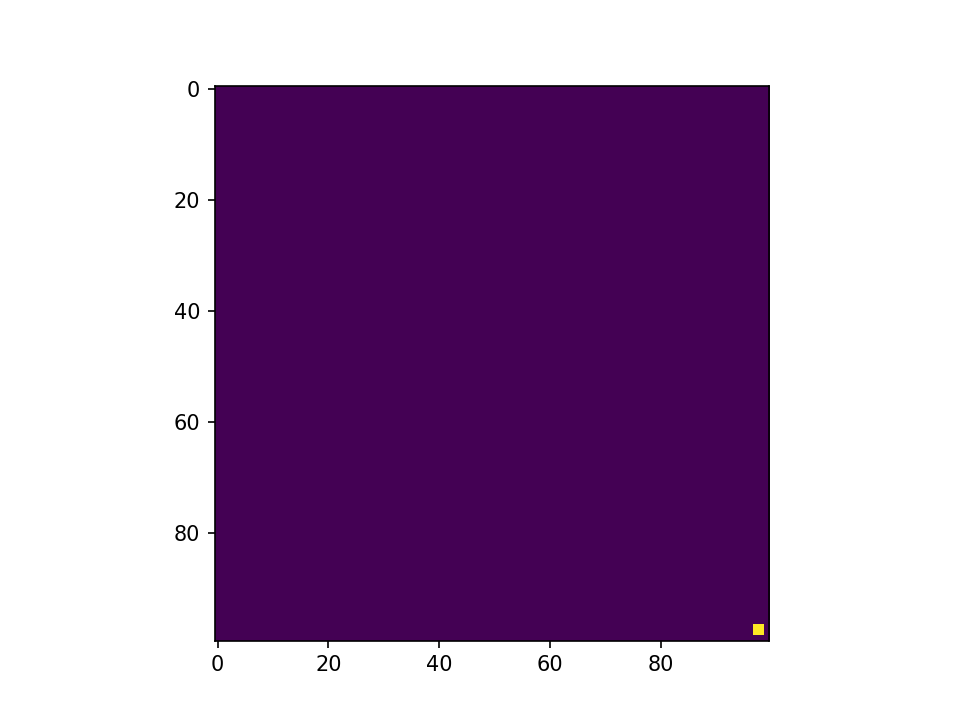

In [129]:
utils.anim(Z_huge)

## Question 12 : Création d'une animation simulant le jeu intialisé aléatoirement

Après avoir créé notre matrice aléatoire de taille 100 par 100, suivant un modèle de Bernouilli dont l'espérance est égale à notre prop_active, on se propose d'effectuer une animation du jeu à partir de notre matrice aléatoire. 

In [146]:
prop_active = (1 + ma_graine) * 10 / 100
Mat = np.zeros((100,100))
Bin = np.random.binomial(1, prop_active, 100*100).reshape((100,100))
Mat = Bin[1:-1, 1:-1]

<IPython.core.display.Javascript object>


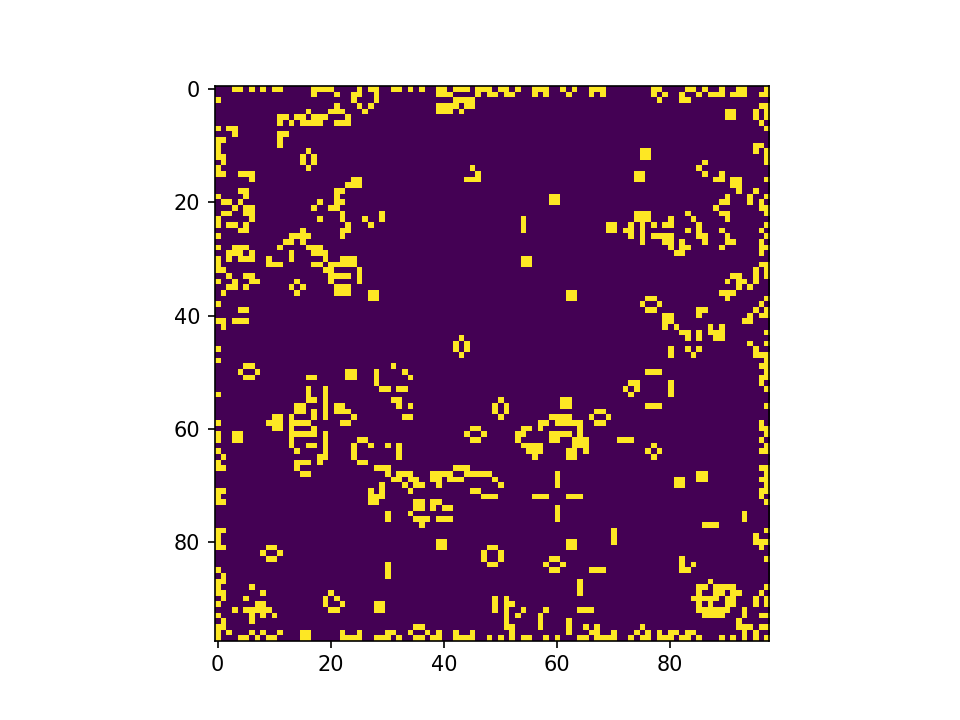

In [147]:
anim(Mat)

## Question 13 : Affichage de l'évolution de différents regroupement cellulaire

### 1) Jeux stables

Tout d'abord, on se propose d'afficher 10 itérations de trois configurations du jeu \emph{stables}. 

#### a) Le serpent

<IPython.core.display.Javascript object>


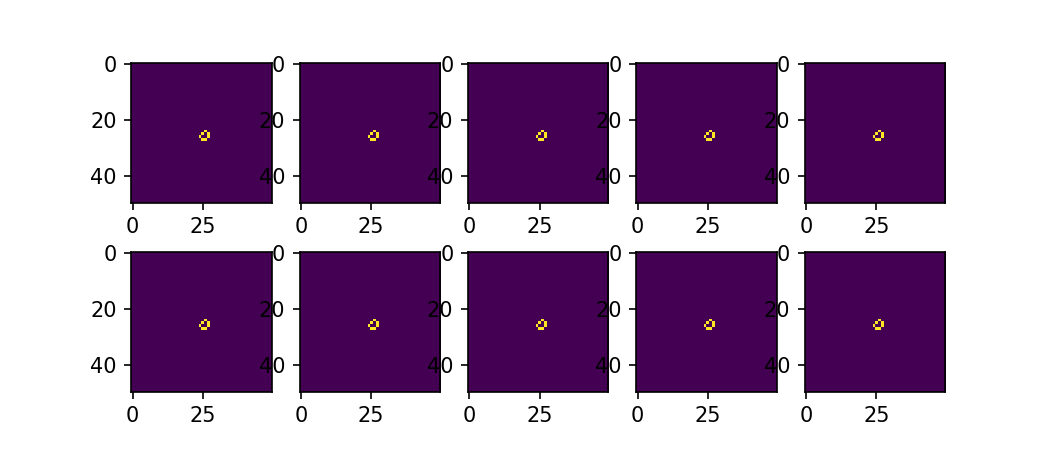

In [131]:
S1 = np.zeros((50, 50))
S1[25,24] = S1[24, 24] = S1[24, 25] = S1[25, 26] = S1[25, 27] = S1[25, 27] = S1[24, 28]  = 1 
utils.affichagede10iterations(S1,iteration_jeu_np)

#### b) La mie de pain

<IPython.core.display.Javascript object>


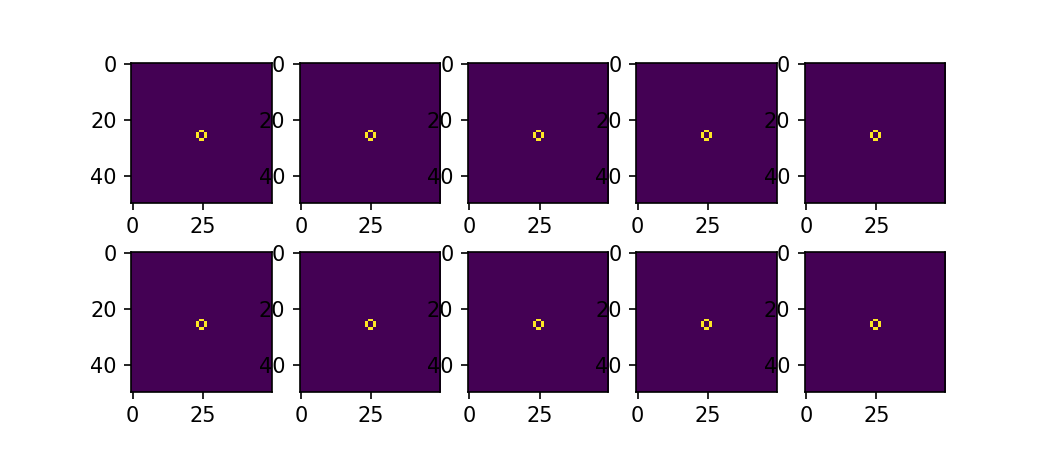

In [132]:
S2 = np.zeros((50,50))
S2[26,24] = S2[25,25] = S2[24,26] = S2[25,27] = S2[26,27] = S2[27, 26] = S2[27,25] = 1 
utils.affichagede10iterations(S2,iteration_jeu_np)

#### c) La bateau (qui coule)

<IPython.core.display.Javascript object>


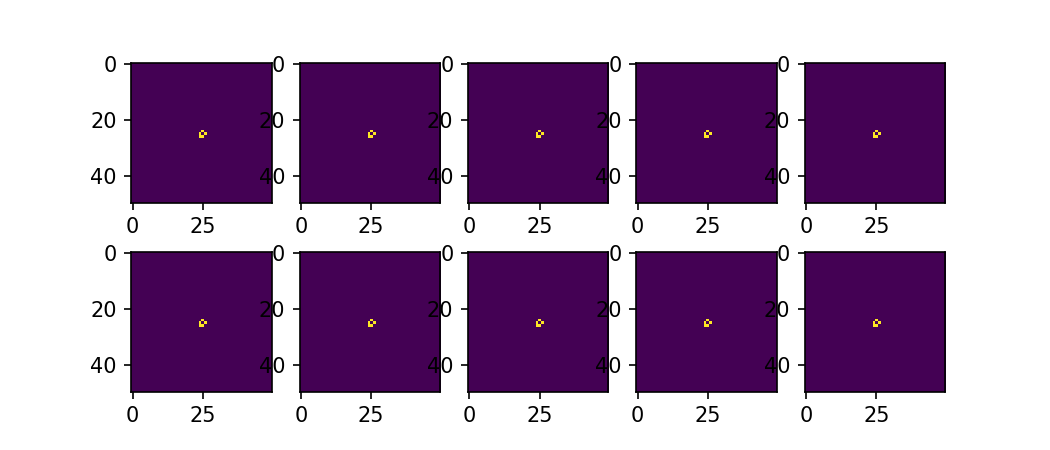

In [133]:
S3 = np.zeros((50,50))
S3[25,24] = S3[26,24] = S3[26,25] = S3[25,26] = S3[24,25] = 1
utils.affichagede10iterations(S3,iteration_jeu_np)

### 2) Jeu oscillant :

Nous allons maintenant simuler un jeu oscillant de période 2.

<IPython.core.display.Javascript object>


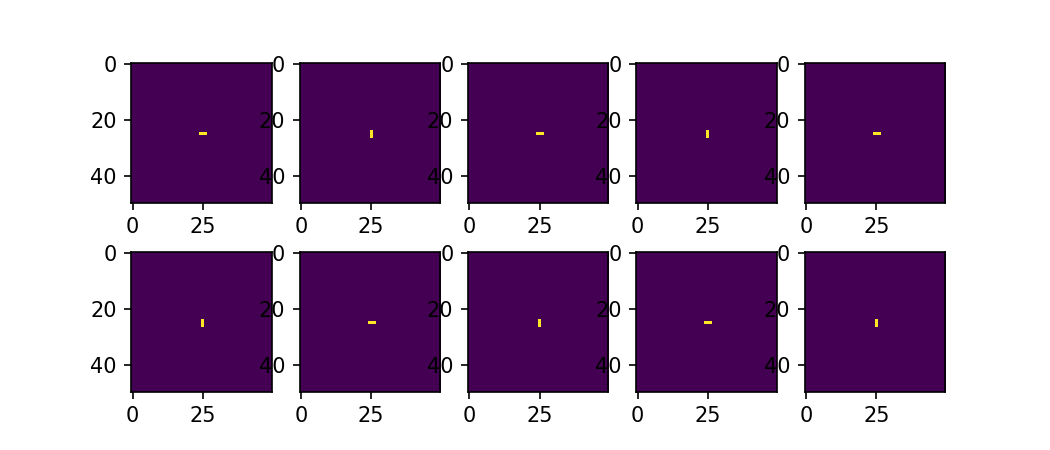

In [134]:

O = np.zeros((50,50))
O[25,24] = O[25,25] = O[25,26] = 1
utils.affichagede10iterations(O,iteration_jeu_np)

## Question 14 : Création d'une classe jeu de la vie

In [135]:
class JeuDeLaVie:

    def __init__(self, init_state, _time_T):
        self.init_state = init_state
        self._time_T = _time_T
        self._dimension = (n_1, n_2) = init_state.shape
        self._historic_state = np.zeros((n1, n2, _time_T+1))
        self._historic_state[:, :, 0] = self.init_state
        self.average_life = np.zeros((n_1, n_2))

    def play(self):
        t = 1
        while(t <= self._time_T):
            self._historic_state[:, :, t] = iteration_jeu_np(self._historic_state[:, :, t-1])
            self.average_life = np.mean(self._historic_state, axis=(2))
            t += 1

    def plot(self):
        plt.imshow(self.average_life)
        plt.show()
        

## Question bonus : Implémentation du jeu sur un tore

Puisque nous ne pouvons pas créer une matrice de taille infini pour implémenter le jeu "à la Pac-Man", nous allons utiliser la fonction np.pad pour que la première valeurs de la matrice soit aussi la dernière. Avec ces conditions là nous allons reprendre les fonctions précédentes pour construire le jeu que l'on va essayer d'animer avec la matrice aléatoire construite à la question 12. 

In [ ]:
def calcul_nb_voisins_tore(Z):
    M = np.pad(Z, 1, mode='wrap')
    nb_voisins = M[0:-2,0:-2] + M[1:-1,:-2] + M[2:,:-2] + M[:-2,1:-1] + M[2,1:-1] + M[:-2,2:] + M[1:-1,2:] + M[2:,2:]
    return(nb_voisins)

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

In [ ]:
def iteration_jeu_np(Z):
    forme = Z.shape
    N = calcul_nb_voisins_tore(Z)
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0 #la cellule meurt
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1 #la cellule nait
    return(Z)

In [ ]:
fig = plt.gcf()
im = plt.imshow(Mat)
plt.show()

def animate(frame):
    im.set_data(iteration_jeu_tore(Mat))
    return im,

ani = animation.FuncAnimation(fig, animate, frames=200)

ani